<a href="https://colab.research.google.com/github/alammobaDar/CCADMACL_EXERCISES_COM231ML/blob/main/Exercise3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [114]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
import pandas as pd

In [115]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

100%|██████████| 14.9k/14.9k [00:00<00:00, 9.94MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/abcsds/pokemon/versions/2


In [116]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [117]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [118]:
rows = df.shape[0]
print(f"Number of Pokemons: {rows}")

Number of Pokemons: 800



List all columns available (3 pts)

In [119]:
print("List of all columns available")
for i in df.columns:
  print(i)

List of all columns available
#
Name
Type 1
Type 2
Total
HP
Attack
Defense
Sp. Atk
Sp. Def
Speed
Generation
Legendary


## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed). (3 pts)

In [120]:
selected_df = df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]]
selected_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


Are there any missing values? (2 pts)

In [121]:
df.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


If missing values exist, describe how you handled them (3 pts)

In [124]:
df["Type 2"] = df["Type 2"].fillna("None")
print(df["Type 2"].value_counts())
df.info()

Type 2
None        386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64

***According to the Pokemon game, some of the pokemons only have one Type and most have two Types. That's why we set all those null values into "None" to be more accurate.***

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [125]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_df)
scaled_df = pd.DataFrame(scaled_features, columns=selected_df.columns)
scaled_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503
1,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015
2,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635
3,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635
4,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853


## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

In [ ]:
nn =  NearestNeighbors(n_neighbors=4)
nn.fit(scaled_df)
distances, indices = nn.kneighbors(scaled_df)

What is your chosen eps based on the "elbow"? (2 pts)

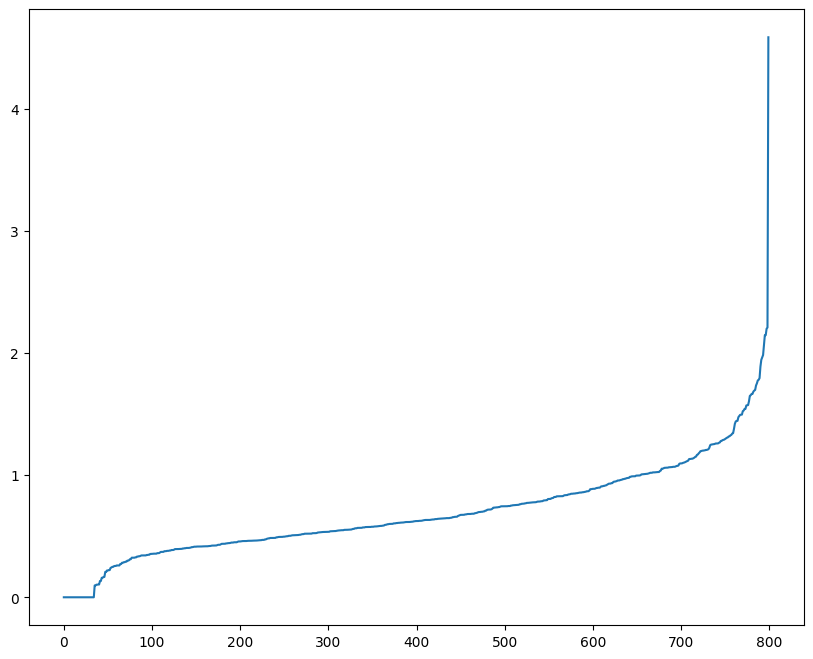

In [163]:
distab = np.sort(distances, axis=0)
distab = distab[:, 1]
plt.figure(figsize=(10,8))
plt.plot(distab)

In [164]:
x = np.arange(len(distab))
y = distab

# Line endpoints
x1, y1 = x[0], y[0]
x2, y2 = x[-1], y[-1]

# Distance from point to line formula
numerator = np.abs((y2 - y1) * x - (x2 - x1) * y + x2*y1 - y2*x1)
denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)

distances_to_line = numerator / denominator

elbow_idx = np.argmax(distances_to_line)
elbow_value = y[elbow_idx]

print("Optimal eps:", elbow_value)


Optimal eps: 1.3306602906490999


One-sentence explanation of your reasoning (2 pts)

***I am going to choose 1.3 as an eps, Because it shows on the plot that it indicates the diminishing returns and is the optimal eps for clustering.***


In [ ]:
# put your answer here

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


How many clusters did DBSCAN find? (4 pts)

In [165]:
min_samples=range(4,15)
ep = 1.3
for min_sample in min_samples:
    db = DBSCAN(eps=ep, min_samples=min_sample, metric="euclidean")
    db.fit(scaled_df)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"min_samples={min_sample}: clusters={n_clusters}")

min_samples=4: clusters=2
min_samples=5: clusters=3
min_samples=6: clusters=2
min_samples=7: clusters=2
min_samples=8: clusters=1
min_samples=9: clusters=1
min_samples=10: clusters=1
min_samples=11: clusters=1
min_samples=12: clusters=1
min_samples=13: clusters=1
min_samples=14: clusters=1


***Based on the for loop above, with an eps of 1.3 and min_samples of 5 we are able to get 3 clusters***

How many Pokémon were labeled as noise? (4 pts)

In [166]:
db = DBSCAN(eps=1.3, min_samples=5, metric="euclidean")
db.fit(scaled_df)
labels = db.labels_
n_noise = list(labels).count(-1)
print(f"noise points={n_noise}")

noise points=78


***With a min_samples of 5 and eps of 1.3, we get 78 pokemons labeled as noise***

Show the unique labels output by DBSCAN (2 pts)

In [167]:
print("Unique labels:", np.unique(labels))

Unique labels: [-1  0  1  2]


## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [168]:
df['cluster'] = db.labels_


Show the first 10 rows including the cluster label (4 pts)

In [169]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,cluster
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [170]:
df["cluster"].value_counts()

,count
cluster,
0,709
-1,78
2,8
1,5


What are the average Attack, Defense, and Speed? (4 pts)


In [171]:
df.groupby("cluster")[["Attack", "Defense", "Speed"]].mean()

,Attack,Defense,Speed
cluster,,,
-1,98.794872,94.410256,73.897436
0,76.390691,70.757405,67.517630
1,56.400000,152.600000,46.000000
2,131.500000,97.500000,94.750000


Compare the clusters: What differences do you notice? (4 pts)

***Based on the results of Average Attack, Defense, and Speed:***


*   **Outliers** - Pokemons that has above average stats among the 3 stats
*   **Cluster 0** - Pokemons that has average stats yet balanced across 3 stats
*   **Cluster 1** - Pokemons that has high Defense stats yet low on remaining ones
*   **Cluster 2** - Pokemons that has high Attack stats and have above average stats on remaining ones.



In [ ]:
# put your answer here

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [172]:
df[df["cluster"] == -1]
df[df["cluster"] == -1]["Name"]

,Name
19,BeedrillMega Beedrill
44,Jigglypuff
45,Wigglytuff
68,Abra
69,Kadabra
...,...
789,Avalugg
795,Diancie
796,DiancieMega Diancie
797,HoopaHoopa Confined


Are many of them legendary? (3 pts)

In [173]:
legendary_outliers = df[(df["cluster"] == -1) & (df["Legendary"] == True)]
print(legendary_outliers[['Name', 'Legendary', 'cluster']])
print(f"Number of legendary outliers: {len(legendary_outliers)}")

                      Name  Legendary  cluster
162                 Mewtwo       True       -1
163    MewtwoMega Mewtwo X       True       -1
164    MewtwoMega Mewtwo Y       True       -1
269                  Lugia       True       -1
270                  Ho-oh       True       -1
414               Regirock       True       -1
415                 Regice       True       -1
418      LatiasMega Latias       True       -1
422    KyogrePrimal Kyogre       True       -1
424  GroudonPrimal Groudon       True       -1
426  RayquazaMega Rayquaza       True       -1
428     DeoxysNormal Forme       True       -1
429     DeoxysAttack Forme       True       -1
430    DeoxysDefense Forme       True       -1
431      DeoxysSpeed Forme       True       -1
552                 Arceus       True       -1
795                Diancie       True       -1
796    DiancieMega Diancie       True       -1
797    HoopaHoopa Confined       True       -1
798     HoopaHoopa Unbound       True       -1
Number of leg

Explain why DBSCAN might classify them as outliers (3 pts)

*    These pokemons are labeled as outliers because even though they are legendary and have above average stats, they are still lacking in terms of specific stats to be clustered with the pokemons who are in cluster 1 and 2 (clusters that represents pokemon that specializes on Attack and Defense)

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:



***What types of Pokémon grouped together (5 pts)***

In [185]:

types_long = pd.concat([
    df[["cluster", "Type 1"]].rename(columns={"Type 1": "Type"}),
    df[["cluster", "Type 2"]].rename(columns={"Type 2": "Type"})
]).dropna()

types_no_none_values = types_long[types_long["Type"] != "None"]

types_no_none_values.groupby(["cluster", "Type"]).size().sort_values(ascending=False)

pivot = pd.pivot_table(
    types_no_none_values,
    index="Type",
    columns="cluster",
    aggfunc="size",
    fill_value=0
)

pivot = pivot.sort_values(by=pivot.columns.tolist(), ascending=False)
pivot


cluster,-1,0,1,2
Type,,,,
Psychic,18,72,0,0
Normal,11,91,0,0
Rock,11,44,3,0
Ghost,9,34,1,2
Flying,8,91,0,2
Bug,8,64,0,0
Water,7,119,0,0
Fairy,7,31,1,1
Steel,6,39,4,0


Cluster 0 contains the majority of the Pokemomn and shows a wide mix of all types such as Water, Grass, Flying, Normal and so on.

Cluster 1 contains of pokemon that mostly Steel and Rock Types fitting on their High Defense Stats.

Cluster 2 contains of pokemon that mostly Dragons with Ice, Ghost, and Dark Types indicating that they have High Attack Stats.

Cluster -1 or the Outliers, These Pokemons are also variety of all Types and the majority is the Psychic Types.

***Whether the clusters make intuitive sense (10 pts)***

The clusters produced by DB scan makes an intuitive sense because it portrays the distinct difference between pokemons in the given dataset. It shows how pokemons varies from each other based on specific stats. For example, Cluster 0 are pokemons that has average stats across 3 main stats which is Attack, Defense and Speed. Cluster 1 are pokemons that are specializing on Defense prior to their types such as Steel and Rock. Cluster 2 are the pokemons that has High Attack stats, mostly are Dragon Type which emphasizes their specialization on Attacks and above average Defense and Speed.

***What the noise points reveal about DBSCAN (5 pts)***

 The outliers(-1) are the pokemons that has above average stats across 3 major stats but do not specialized on specific stats. this outliers represented pokemons that are strong and balanced.

***What stat patterns you discovered (5 pts)***



Based on the results of Average Attack, Defense, and Speed:

    Outliers - Pokemons that has above average stats among the 3 stats
    Cluster 0 - Pokemons that has average stats yet balanced across 3 stats
    Cluster 1 - Pokemons that has high Defense stats yet low on remaining ones
    Cluster 2 - Pokemons that has high Attack stats and have above average stats on remaining ones.

